In [1]:
import numpy
import pandas
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from davitpy import utils
from davitpy import gme
import aacgmv2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [15]:
inpDir = "../data/"
coords = "geo"
inpGlatFile = None
inpGlonFile = None
inpTime = datetime.datetime(2014,12,14,22)

In [3]:
def convert_aacgm_geo(row, a2g=False):
    """
    Convert glat, glon values 
    into aacgm coords : MLAT, MLON
    and MLT.
    """
    for col in row.keys():
        if col.isdigit():
            currDate = datetime.datetime.strptime(\
                            col, "%Y%m%d%H%M%S" )
            mlat, mlon = aacgmv2.convert(row["glat"],\
                        row["glon"],\
                        300, currDate)
            mlt = aacgmv2.convert_mlt(mlon,\
                            currDate, m2a=False)
            row["mlat"] = numpy.round( mlat, 2)
            row["mlon"] = numpy.round( mlon, 2)
            row["mlt_" + col] = numpy.round( mlt, 2)
    return row

In [4]:
# Loop through the directory and get
# the required pixel value files
asiDict = {}
for pFn in os.listdir(inpDir):
    if os.path.isfile(inpDir + pFn):
        # check if the file is a pixel file
        # or a glat/glon file or some random
        # file which we don't need
        if "glat" in pFn:
            if inpGlatFile is None:
                asiDict["glat"] = numpy.loadtxt(inpDir + pFn).ravel()
        elif "glon" in pFn:
            if inpGlonFile is None:
                asiDict["glon"] = numpy.loadtxt(inpDir + pFn).ravel()
        else:
            fNameList = pFn.split("_")
            # Now check if the first element
            # is a digit (date)!
            if fNameList[0].isdigit():
                # Now get the date of the image
                fDate = datetime.datetime.strptime(\
                            fNameList[0], "%Y%m%d%H%M%S" )
                currPixels = numpy.loadtxt(inpDir + pFn).ravel()
                asiDict[fNameList[0]] = currPixels
asiDF = pandas.DataFrame.from_dict(asiDict)
asiDF = asiDF.apply(convert_aacgm_geo, axis=1) 

In [5]:
asiDF.head(100)

20141214220035  20141214220235   glat   glon   mlat    mlon  \
0            0.000           0.000    NaN    NaN    NaN     NaN   
1            0.000           0.000    NaN    NaN    NaN     NaN   
2            0.000           0.000    NaN    NaN    NaN     NaN   
3          128.600           0.000    NaN    NaN    NaN     NaN   
4            0.000           0.000    NaN    NaN    NaN     NaN   
5         5609.000           0.000    NaN    NaN    NaN     NaN   
6            0.000           0.000    NaN    NaN    NaN     NaN   
7         2520.000        7535.000    NaN    NaN    NaN     NaN   
8            0.000           0.000    NaN    NaN    NaN     NaN   
9            0.000           0.000    NaN    NaN    NaN     NaN   
10        1608.000        1177.000    NaN    NaN    NaN     NaN   
11        1842.000        2883.000    NaN    NaN    NaN     NaN   
12           0.000           0.000    NaN    NaN    NaN     NaN   
13         407.800           0.000    NaN    NaN    NaN     NaN   
14           0.000         324.800    NaN    NaN    NaN     NaN   
15           0.000        1136.000    NaN    NaN    NaN     NaN   
16        5190.000        2998.000    NaN    NaN    NaN     NaN   
17           0.000           0.000    NaN    NaN    NaN     NaN   
18         462.200         134.600    NaN    NaN    NaN     NaN   
19         834.800        1221.000    NaN    NaN    NaN     NaN   
20           0.000           0.000    NaN    NaN    NaN     NaN   
21        1679.000           0.000    NaN    NaN    NaN     NaN   
22           0.000           0.000    NaN    NaN    NaN     NaN   
23        1172.000        2785.000    NaN    NaN    NaN     NaN   
24           0.000           0.000    NaN    NaN    NaN     NaN   
25           0.000           0.000    NaN    NaN    NaN     NaN   
26           0.000           0.000    NaN    NaN    NaN     NaN   
27           0.000           0.000    NaN    NaN    NaN     NaN   
28         370.600        2581.000    NaN    NaN    NaN     NaN   
29        1090.000         580.600    NaN    NaN    NaN     NaN   
..             ...             ...    ...    ...    ...     ...   
70           8.810           8.167  62.39  62.39  59.31  137.08   
71          25.030          15.130  62.71  62.71  59.61  137.45   
72          19.900          17.900  63.03  63.03  59.92  137.82   
73          10.090           1.668  63.33  63.33  60.20  138.16   
74           9.926          12.900  63.61  63.61  60.47  138.49   
75          15.290          19.330  63.89  63.89  60.73  138.81   
76          28.850          21.190  64.15  64.15  60.98  139.11   
77          30.230          33.830  64.41  64.41  61.22  139.42   
78          19.620          24.860  64.67  64.67  61.47  139.72   
79          49.920          50.060  64.89  64.89  61.68  139.98   
80          31.130          27.560  65.13  65.13  61.90  140.26   
81          21.440          24.050  65.35  65.35  62.11  140.52   
82          38.030          36.230  65.57  65.57  62.32  140.78   
83          33.530          39.390  65.79  65.79  62.52  141.04   
84          97.270         107.000  65.97  65.97  62.69  141.25   
85          58.690          59.490  66.17  66.17  62.88  141.48   
86          57.180          56.220  66.37  66.37  63.07  141.72   
87          63.250          65.410  66.53  66.53  63.22  141.91   
88          77.860          83.710  66.71  66.71  63.38  142.12   
89          90.330          80.220  66.87  66.87  63.53  142.31   
90          89.170          79.070  67.05  67.05  63.70  142.53   
91          97.850          93.010  67.19  67.19  63.83  142.69   
92          81.740          80.260  67.35  67.35  63.98  142.89   
93          97.750         106.200  67.49  67.49  64.11  143.05   
94         113.400         115.400  67.63  67.63  64.24  143.22   
95         113.300         107.600  67.77  67.77  64.37  143.39   
96         115.900         122.900  67.89  67.89  64.48  143.53   
97         114.900         120.500  68.01  68.01  6

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


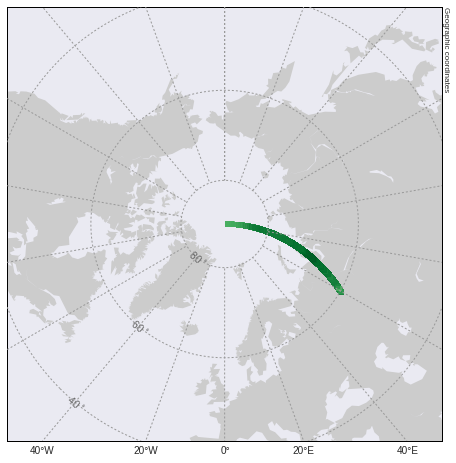

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
m = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0, datetime=inpTime)
# choose lats & lons based on input coords
if coords == "geo":
    asiLats = selAsiDF["glat"].values
    asiLons = selAsiDF["glon"].values
else:
    asiLats = selAsiDF["mlat"].values
    if coords == "mag":
        asiLons = selAsiDF["mlon"].values
    else:
        asiLons = selAsiDF["mlt_20141214220035"].values*15.
# choose pixel values
# There is a broad range of values
# so we'll use a logarighmic scale
asiPix = numpy.log( selAsiDF["20141214220035"].values )
xVecs, yVecs = m(asiLats, asiLons,\
                         coords=coords)
ssusiPlot = m.scatter(xVecs, yVecs, c=asiPix, s=30.,\
                       cmap="Greens", alpha=0.7, zorder=7, \
                                 edgecolor='none', marker="s")

In [17]:
print asiPix.min(), asiPix.max()

-inf 10.350414450451886
